✅ Data Loaded Successfully!
🔴 Red Wine Shape: (1599, 12)
⚪ White Wine Shape: (4898, 12)

Null values check:
Red Wine:
 0 missing values
White Wine:
 0 missing values


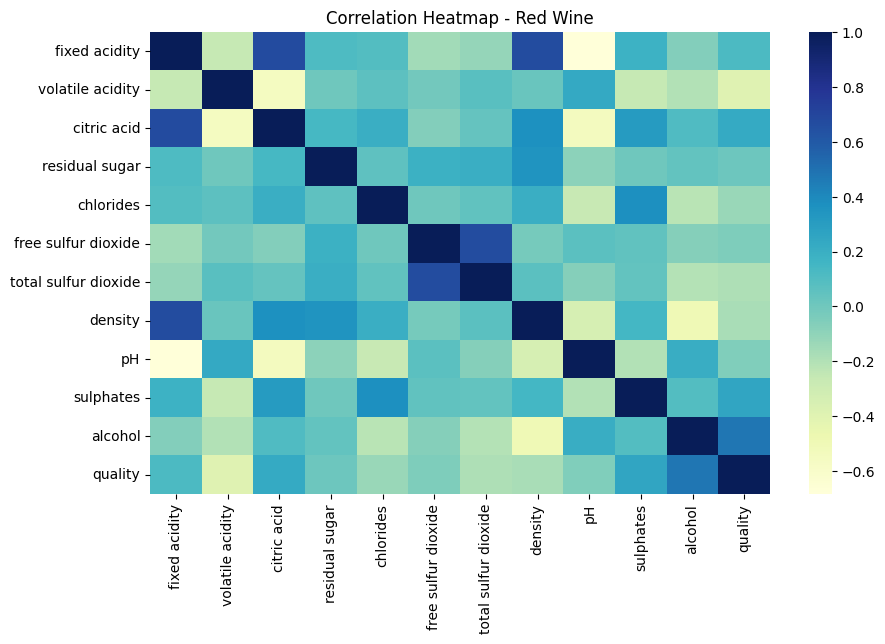

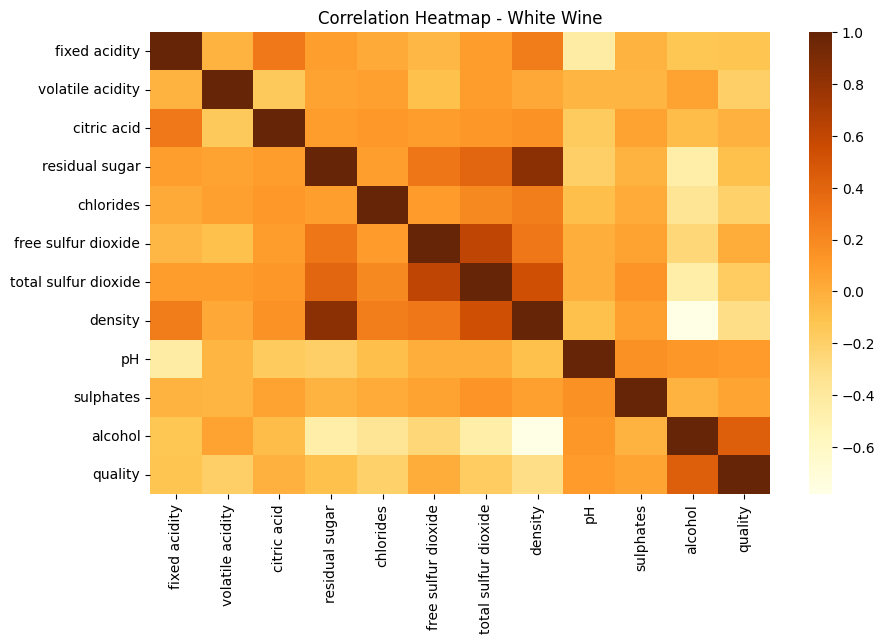

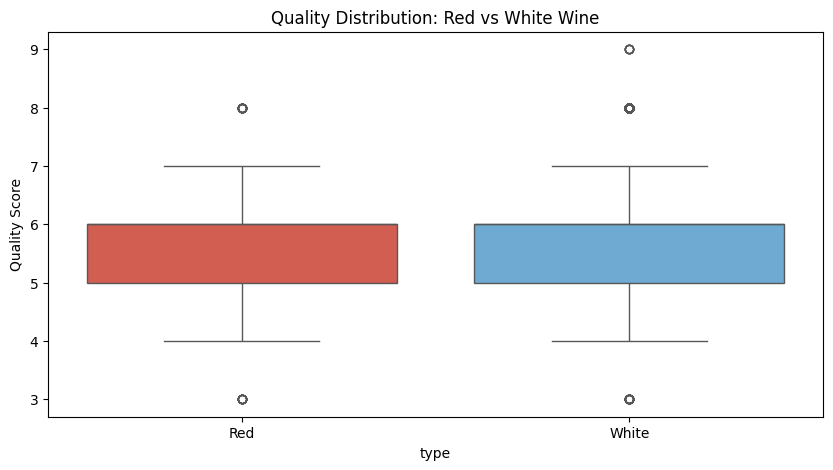


📊 Results for Red Wine Dataset
MAE  : 0.4696
MSE  : 0.3845
RMSE : 0.6201
L1 Loss: 150.2826
L2 Loss: 123.0308
---------------------------------------------

📊 Results for White Wine Dataset
MAE  : 0.6297
MSE  : 0.6598
RMSE : 0.8123
L1 Loss: 617.1067
L2 Loss: 646.6484
---------------------------------------------

🔧 SGDRegressor Learning Rate Experiment:
Learning Rate = 0.0005 → MSE: 0.3850
Learning Rate = 0.005 → MSE: 0.3958
Learning Rate = 0.05 → MSE: 1.2682


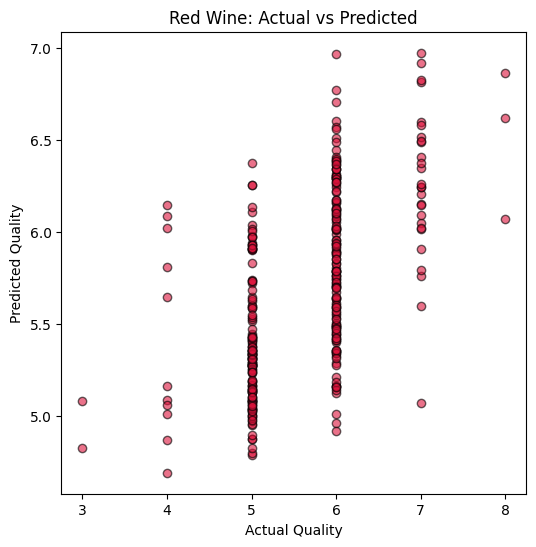

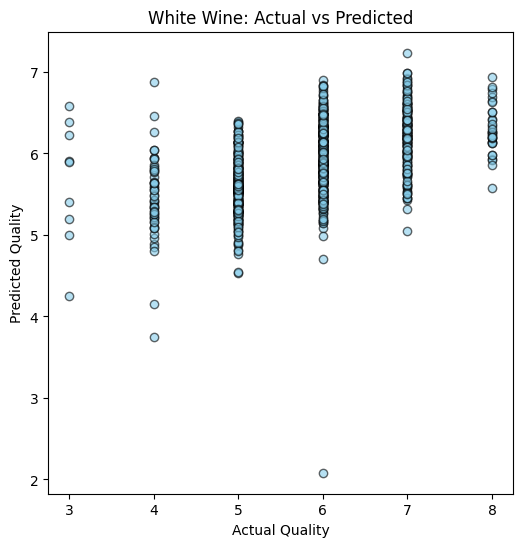


📈 Final Comparison
Red Wine   → MAE: 0.4696, MSE: 0.3845
White Wine → MAE: 0.6297, MSE: 0.6598

✅ Linear Regression performs slightly better on Red Wine.


In [10]:
# Wine Quality Prediction using Linear Regression
# Author: Akram Hossain Tanveer
# Description: Compare Red and White Wine datasets using Linear Regression and SGDRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# ==========================
# 1. Load Datasets
# ==========================
red_df = pd.read_csv("winequality-red.csv", sep=';')
white_df = pd.read_csv("winequality-white.csv", sep=';')

print("✅ Data Loaded Successfully!")
print(f"🔴 Red Wine Shape: {red_df.shape}")
print(f"⚪ White Wine Shape: {white_df.shape}")

# Check for missing values
print("\nNull values check:")
print("Red Wine:\n", red_df.isnull().sum().sum(), "missing values")
print("White Wine:\n", white_df.isnull().sum().sum(), "missing values")

# ==========================
# 2. Data Preprocessing
# ==========================
scale = StandardScaler()

Xr = red_df.drop(columns=['quality'])
yr = red_df['quality']

Xw = white_df.drop(columns=['quality'])
yw = white_df['quality']

Xr_scaled = scale.fit_transform(Xr)
Xw_scaled = scale.fit_transform(Xw)

# ==========================
# 3. Exploratory Visualization
# ==========================

plt.figure(figsize=(10,6))
sns.heatmap(red_df.corr(), cmap='YlGnBu', annot=False)
plt.title("Correlation Heatmap - Red Wine")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(white_df.corr(), cmap='YlOrBr', annot=False)
plt.title("Correlation Heatmap - White Wine")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(
    x='type',
    y='quality',
    hue='type',          # Added hue
    data=wine_df,        # Use the already defined wine_df
    palette=['#E74C3C', '#5DADE2'],
    legend=False         # Disable duplicate legend
)
plt.ylabel("Quality Score")
plt.title("Quality Distribution: Red vs White Wine")
plt.show()


# ==========================
# 4. Split Train & Test
# ==========================
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, yr, test_size=0.2, random_state=0)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw_scaled, yw, test_size=0.2, random_state=0)

# ==========================
# 5. Linear Regression Model
# ==========================
lin_r = LinearRegression()
lin_w = LinearRegression()

lin_r.fit(Xr_train, yr_train)
lin_w.fit(Xw_train, yw_train)

yr_pred = lin_r.predict(Xr_test)
yw_pred = lin_w.predict(Xw_test)

# ==========================
# 6. Evaluation Function
# ==========================
def evaluate(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    l1 = np.sum(np.abs(y_true - y_pred))
    l2 = np.sum((y_true - y_pred)**2)
    print(f"\n📊 Results for {name} Dataset")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"L1 Loss: {l1:.4f}")
    print(f"L2 Loss: {l2:.4f}")
    print("-" * 45)
    return mae, mse

mae_r, mse_r = evaluate(yr_test, yr_pred, "Red Wine")
mae_w, mse_w = evaluate(yw_test, yw_pred, "White Wine")

# ==========================
# 7. Hyperparameter Tuning (SGD)
# ==========================
print("\n🔧 SGDRegressor Learning Rate Experiment:")

for rate in [0.0005, 0.005, 0.05]:
    sgd = SGDRegressor(learning_rate='constant', eta0=rate, max_iter=1500, tol=1e-3)
    sgd.fit(Xr_train, yr_train)
    pred = sgd.predict(Xr_test)
    mse = mean_squared_error(yr_test, pred)
    print(f"Learning Rate = {rate} → MSE: {mse:.4f}")

# ==========================
# 8. Visualization of Predictions
# ==========================
plt.figure(figsize=(6,6))
plt.scatter(yr_test, yr_pred, color='crimson', alpha=0.6, edgecolor='k')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Red Wine: Actual vs Predicted")
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(yw_test, yw_pred, color='skyblue', alpha=0.6, edgecolor='k')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("White Wine: Actual vs Predicted")
plt.show()

# ==========================
# 9. Final Comparison & Conclusion
# ==========================
print("\n📈 Final Comparison")
print(f"Red Wine   → MAE: {mae_r:.4f}, MSE: {mse_r:.4f}")
print(f"White Wine → MAE: {mae_w:.4f}, MSE: {mse_w:.4f}")

if mse_r < mse_w:
    print("\n✅ Linear Regression performs slightly better on Red Wine.")
else:
    print("\n✅ Linear Regression performs slightly better on White Wine.")
